In [2]:
# Ask what is the probability that the cosmic-ray background would have given you a measurement as 
# signal-like or more than the signal that you received.

In [29]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

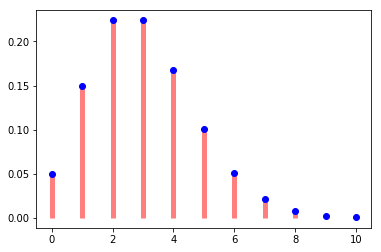

In [50]:
avg_cosmic_background = 3; offset = 0

x = np.linspace(0,10,11)
plt.plot(x, stats.poisson.pmf(x, avg_cosmic_background, offset), 'bo', lw=0)
plt.vlines(x,0, stats.poisson.pmf(x, avg_cosmic_background, offset), colors = 'r', lw=5, alpha=.5 )

[0.04978707 0.19914827 0.42319008 0.64723189 0.81526324 0.91608206
 0.96649146 0.9880955  0.99619701 0.99889751 0.99970766]


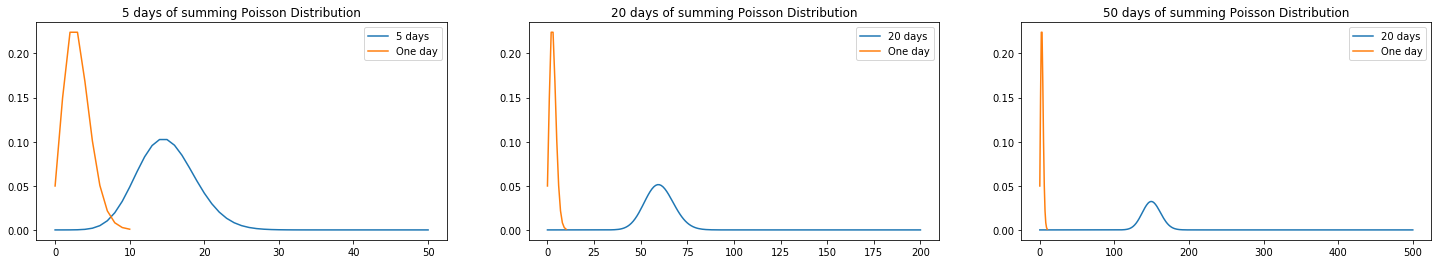

In [82]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.plot(y1, label = f'{days} days')
ax.plot(err_data, label = 'One day')
ax.set_title('5 days of summing Poisson Distribution')
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.plot(y2, label = f'{days_1} days')
ax1.plot(err_data, label = 'One day')
ax1.set_title('20 days of summing Poisson Distribution')
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.plot(y3, label = f'{days_1} days')
ax2.plot(err_data, label = 'One day')
ax2.set_title('50 days of summing Poisson Distribution')
ax2.legend()


p = 1 - ((1 - stats.poisson.cdf(x, avg_cosmic_background)))
print(p)

After 5 days of averaging the poisson distribution, the resulting distribution will still be gaussian because I am now ... This makes sense from a conceptual point of view because I am ... From a mathematical point of view ... 

AttributeError: 'NoneType' object has no attribute 'update'

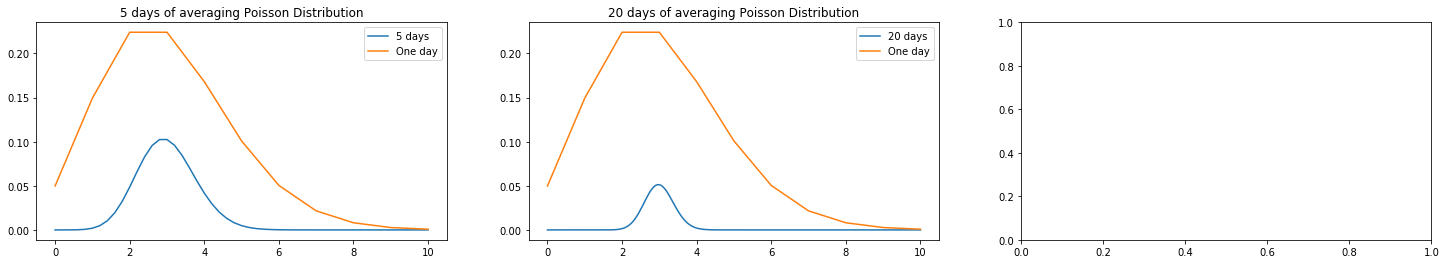

In [102]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
new_x = np.linspace(0, 10*days, 10*days+1)/days
    
ax.plot(new_x, y1, label = f'{days} days')
ax.plot(x, err_data, label = 'One day')
ax.set_title('5 days of averaging Poisson Distribution')
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
new_x1 = np.linspace(0, 10*days_1, 10*days_1+1)/days_1 
    
ax1.plot(new_x1, y2, label = f'{days_1} days')
ax1.plot(x, err_data, label = 'One day')
ax1.set_title('20 days of averaging Poisson Distribution')
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
new_x2 = np.linspace(0, 10*days_2, 10*days_2+1)/days_2 

ax2.vlines(new_x2, y3, 'bo', lw = 5/days_2, label = f'{days_2} days')
#ax2.plot(x, err_data, label = 'One day')
ax2.set_title('50 days of averaging Poisson Distribution')
ax2.legend()

p = 1 - ((1 - stats.poisson.cdf(x, avg_cosmic_background)))
print(p)